In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [ ]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/Library/CloudStorage/GoogleDrive-dh.huang.2023@smu.edu.sg/My Drive/logical-reasoning


In [ ]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/Library/CloudStorage/GoogleDrive-dh.huang.2023@smu.edu.sg/My Drive/logical-reasoning/.env.example


True

In [ ]:
import pandas as pd

df = pd.read_csv("datasets/mgtv/train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    25000 non-null  object 
 1   label   25000 non-null  object 
 2   answer  0 non-null      float64
 3   title   25000 non-null  object 
 4   puzzle  25000 non-null  object 
 5   truth   25000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
df["label"].value_counts()

label
不是      11783
是        6591
不重要      5076
问法错误      921
回答正确      629
Name: count, dtype: int64

In [12]:
df["puzzle"].value_counts()

puzzle
在一个寂静的夜晚，甄贾贾匆匆忙忙地从小巷子里跑了出来，脸上满是惊恐。在他身后，一只空荡荡的垃圾桶翻倒在地。甄贾贾并非小巷里的居民，也没有与人结怨。究竟是什么原因让他如此惊慌失措？                                                            10058
在一栋老旧居民楼的地下室。一天，警方接到报案，有人在地下室中发现了甄好奇的遗体。现场没有打斗的痕迹，也没有明显的自杀工具。死者被发现时坐在一把椅子上，表情平静，似乎在死前并未经历痛苦。地下室除了一台电视和一张桌子外，没有其他物品。桌上有一杯水，电视还开着。究竟是什么原因导致了甄好奇的死亡？     9345
一个晴朗的周末，公园的长椅上发生了一件奇怪的事情。一位老人每天下午都会来到这个公园的同一张长椅上看书。但今天，当他像往常一样来到公园时，却发现他的椅子不见了。更奇怪的是，公园里的其他椅子都完好无损，唯独他那张椅子不见了踪影。                                      1719
在一片宁静的沙滩上，甄德帅突然惊慌失措地跑来跑去，似乎在寻找着什么。他的举动引起了其他沙滩游客的注意，但没有人能理解他到底在做什么。                                                                                    1401
在一个寂静的夜晚，考古学家甄历史被发现死在了他刚刚发掘的古埃及墓穴中。他的身体趴在一张石桌上，周围散落着各种神秘的古埃及文物。令人不解的是，墓穴内并没有打斗的痕迹，甄历史的表情安详，似乎是在某种不可思议的平静中结束了自己的生命。请还原真相。                               866
在神秘的森林深处，有一个小木屋。某天，一只狐狸突然冲进小木屋，紧接着又冲了出来，然后又冲了进去……如此反复十几次。这是怎么回事？                                                                                       539
在一个安静的夜晚，小镇上的钟楼突然停止了报时。第二天早晨，人们发现钟楼的管理员甄大勇失踪了，而钟楼的门紧闭，从外面看起来一切正

In [13]:
df["truth"].value_counts()

truth
原来，甄贾贾是一名正在潜逃的小偷。当晚，他企图在巷子里寻找可以盗窃的目标，却不料垃圾桶里突然窜出一只野猫，将他吓了一跳。他以为是被警方发现了，于是惊慌失措地逃跑了。而那只垃圾桶，正是他翻找东西时不小心弄翻的。                                                                                                      10058
甄好奇其实是一位科幻小说作家，患有严重的幽闭恐惧症。他为了寻找写作的灵感，常常独自一人来到这个地下室观看科幻电影。不幸的是，有一天他在观看电影时突然遭遇停电，地下室一片漆黑。他的幽闭恐惧症发作，极度恐慌中误以为自己被困在一个未知的宇宙空间。在这种极端恐惧的状态下，他突发心脏病，平静地离开了人世。由于心脏病发作时没有痛苦，所以他的表情看起来很平静。而桌上的水和开着的电视，只是他日常在地下室写作时的习惯。     9345
真相是，公园里的园艺工人前一天晚上在修剪树枝时不小心弄坏了一盏路灯。他们为了修理路灯，临时把那张长椅搬过去当作梯子使用。修理完毕后，他们忘了把长椅放回原位，导致老人找不到自己的椅子。而那张长椅，此刻正无辜地躺在公园的角落里，上面还写着：“我不是椅子，我是临时梯子。”                                                                          1719
原来，甄德帅是一位环保志愿者，他在沙滩上发现了一只被渔网缠住的幼海龟。幼海龟的生命危在旦夕，甄德帅急于寻找工具来解救它。然而，由于紧张和焦急，他无法用言语清楚地表达自己的意图，导致其他游客误以为他是在寻找失物。                                                                                                      1401
甄历史在研究古埃及文物时，意外地发现了一枚罕见的魔法符文石。在深入的研究中，他偶然激活了符文石上的诅咒。这个诅咒能让触碰它的人在一种幻觉中看到自己最渴望的事情，并由此进入一种假死状态。实际上，甄历史是在幻觉中体验了回到古埃及黄金时代的场景，心满意足地结束了自己的生命。而这一切，外人都无法理解

In [16]:
len(df["title"].value_counts()), len(df["puzzle"].value_counts()), len(df["truth"].value_counts())

(16, 16, 16)

In [21]:
from matplotlib.font_manager import fontManager
import os

fonts = [
    font.name
    for font in fontManager.ttflist
    if "Hei" in font.name or "YaHei" in font.name
]
for font in fonts:
    print(font)

STHeiti
LiHei Pro
Hei
Heiti TC
Heiti TC
STHeiti


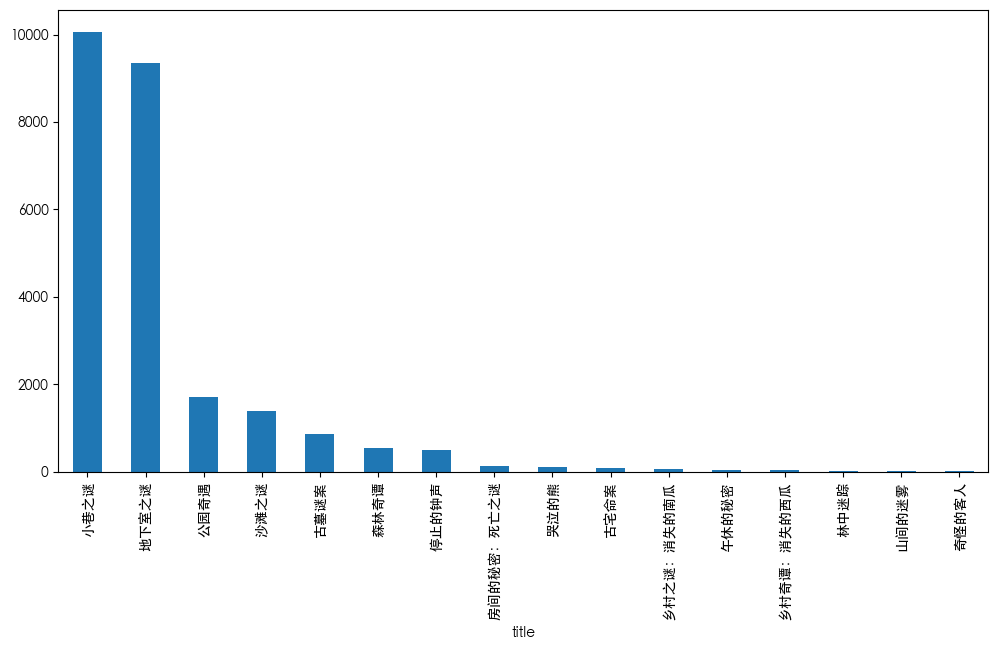

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to SimHei to support Chinese characters
rcParams["font.family"] = "STHeiti"
rcParams["axes.unicode_minus"] = False  # This is to support the minus sign in Chinese.

plt.figure(figsize=(12, 6))
df["title"].value_counts().plot(kind="bar")
plt.show()

In [23]:
df_dev = pd.read_csv("datasets/mgtv/dev.csv")
len(df_dev["title"].value_counts()), len(df_dev["puzzle"].value_counts()), len(
    df_dev["truth"].value_counts()
)

(5, 5, 5)

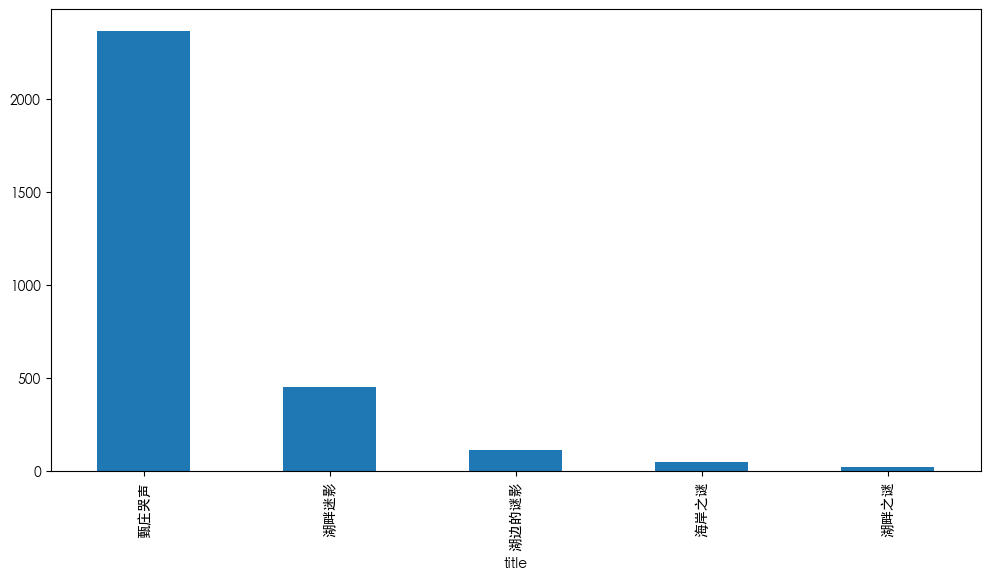

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to SimHei to support Chinese characters
rcParams["font.family"] = "STHeiti"
rcParams["axes.unicode_minus"] = False  # This is to support the minus sign in Chinese.

plt.figure(figsize=(12, 6))
df_dev["title"].value_counts().plot(kind="bar")
plt.show()

In [26]:
df_test_a = pd.read_csv("datasets/mgtv/test_a.csv")
len(df_test_a["title"].value_counts()), len(df_test_a["puzzle"].value_counts()), len(
    df_test_a["truth"].value_counts()
)

(3, 3, 3)

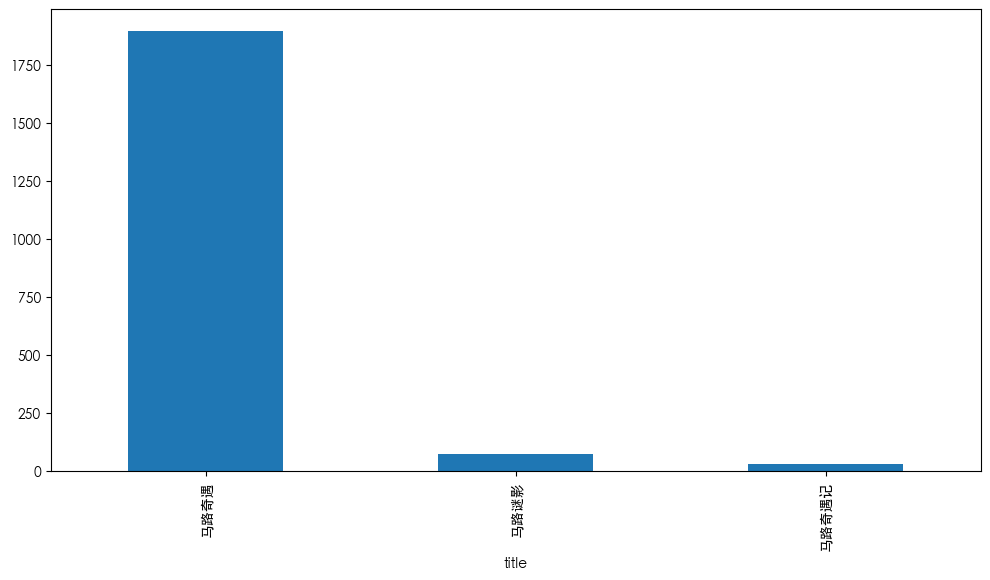

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to SimHei to support Chinese characters
rcParams["font.family"] = "STHeiti"
rcParams["axes.unicode_minus"] = False  # This is to support the minus sign in Chinese.

plt.figure(figsize=(12, 6))
df_test_a["title"].value_counts().plot(kind="bar")
plt.show()